## Lab 4 - part 2: Data Weights and Autocorellation

**TU Delft and WUR**<br>
**Q1 2024**<br>
**Instructor:** Theodoros Chatzivasileiadis <br>
**Instructor:** Hans Hoogenboom <br>
**TA:** Ka Yi Chua <br>
**[Metropolitan Data 1](https://jhoogenboom.github.io/spatial-data-science/_index.html)** <br>



## Exercise 4a: Spatial Autocorrelation and ESDA 

USE the Liverpool IMD data we have been using in previous sessions. This will require you to:

* Load up the IMD dataset for Liverpool.
* Create a choropleth of the `imd_score` variable.
* Compute the spatial weights matrix for the LSOAs. Think of one criterium to build it that you think would fit this variable (e.g. contiguity, distance-based, etc.), and apply it.
* Create the standardized version of the IMD scores.
* Calculate the spatial lag of the standardized scores.
* Create the Moran Plot.
* Calculate the value of Moran's I as well as its significance level.
* Perform a LISA analysis and generate a map of the results. What are the main patterns?

In [4]:
# your code here


For this part I would like you to experiment with Data from Amsterdam. However this will require you to find the dataset yourself!

## Question 1: Building a Contiguity-Based Weight Matrix

Use PySAL to create a contiguity-based weight matrix (W) for a given spatial dataset of polygons. Write a function create_contiguity_weights that:

    Reads in a shapefile of polygons.
    Constructs a Queen contiguity-based spatial weights matrix.
    Returns the weight matrix.

In [71]:
#importing all the libraries required to complete the excersises
import seaborn as sns
import pandas as pd
import pysal as ps
from pysal.lib import weights
from libpysal.io import open as psopen
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
sportfields_shp = 'data/homework data/Sportvelden 05122019.shp' #load in the data file
lookup_path = 'data/IMD/OAs/'

#loading the IMD Data
sportfields = gpd.read_file(sportfields_shp)

sportfields.head()



,GUID,SPORTPARK,FUNCTIONEE,OBJECTTYPE,TYPE_OBJEC,VELD_INDEL,JAAR_VAN_A,SPORTFUNCT,MATERIAAL,OMTREK_GIS,OPPERVLAKT,geometry
0,{E3710BD2-A5E2-48A6-8486-B9B3F8E18FC8},Sportpark Middenmeer-Voorland,Sportpark Middenmeer-Voorland 02,Sportveld (begroeid),Gras- en kruidachtigen,SPO-MIDD-15,2012.0,Honkbal/softbal,Gras,314.84447,5825.39499,"POLYGON ((125102.894 484689.877, 125101.551 48..."
1,{F161AD0A-399D-4CCD-8E7E-ADBBE9CCAFB6},Sportpark Middenmeer-Voorland,Sportpark Middenmeer-Voorland 02,Sportveld (begroeid),Gras- en kruidachtigen,SPO-MIDD-18,2017.0,Voetbal,Gras,355.09103,7534.40041,"POLYGON ((124921.326 484749.999, 124886.684 48..."
2,{7EFD6D90-A589-47EF-9E9B-60178BF50C56},Sportpark Middenmeer-Voorland,Sportpark Middenmeer-Voorland 02,Sportveld (begroeid),Gras- en kruidachtigen,SPO-MIDD-14,2012.0,Honkbal/softbal,Gras,354.32389,7706.39551,"POLYGON ((125214.673 484730.562, 125244.650 48..."
3,{A422479A-24BD-4566-89F4-30D07091A2CA},Sportpark Middenmeer-Voorland,Sportpark Middenmeer-Voorland 02,Sportveld (begroeid),Gras- en kruidachtigen,SPO-MIDD-12,2016.0,Voetbal,Gras,348.86479,7278.19272,"POLYGON ((125196.318 484594.694, 125269.853 48..."
4,{9991F3F0-214A-4423-A7B1-EE02DA16CBF0},Sportpark Middenmeer-Voorland,Sportpark Middenmeer-Voorland 04,Sportveld (begroeid),Gras- en kruidachtigen,SPO-MIDD-24,2010.0,Voetbal,Gras,351.63656,7317.29683,"POLYGON ((125406.020 484628.727, 125387.178 48..."


In [36]:
w_queen = weights.Queen.from_dataframe(sportfields, ids='GUID')
w_queen

## Question 2: Calculating Moran’s I

Write a function calculate_morans_i that:

    Takes a spatial weight matrix W and an attribute array y.
    Calculates Moran’s I for the given attribute array.
    Returns the Moran’s I value and its p-value.

In [3]:
w_queen 


## Question 3: Standardizing Spatial Weight Matrices

Create a function standardize_weights that:

    Takes a spatial weight matrix W.
    Standardizes it so that the weights of each row sum to one.
    Returns the standardized weight matrix.

In [57]:
def standardize_weight(data, column):
    data.transform = 'R'
    return data[column]

standardize_weight(w_queen, '{E3710BD2-A5E2-48A6-8486-B9B3F8E18FC8}')

{'{7EFD6D90-A589-47EF-9E9B-60178BF50C56}': 1.0}

## Question 4: Creating Distance-Based Weights

Write a function create_distance_weights that:

    Takes a set of point coordinates and a threshold distance.
    Constructs a distance-based spatial weight matrix where all points within the threshold distance are assigned a weight.
    Returns the weight matrix.

In [64]:
def create_distance_weight(c):
    w_dist2kmB = weights.DistanceBand.from_dataframe(c, 2000)
    w_dist2kmB['geometry']

create_distance_weight(w_queen)


AttributeError: 'Queen' object has no attribute 'geometry'

## Question 5: Visualizing a Moran Plot

Using PySAL, write a function plot_moran that:

    Takes a spatial weights matrix W and an attribute array y.
    Creates and displays a Moran plot for the attribute.
    Saves the Moran plot as an image file.

KeyError: 'JAAR_VAN_A'

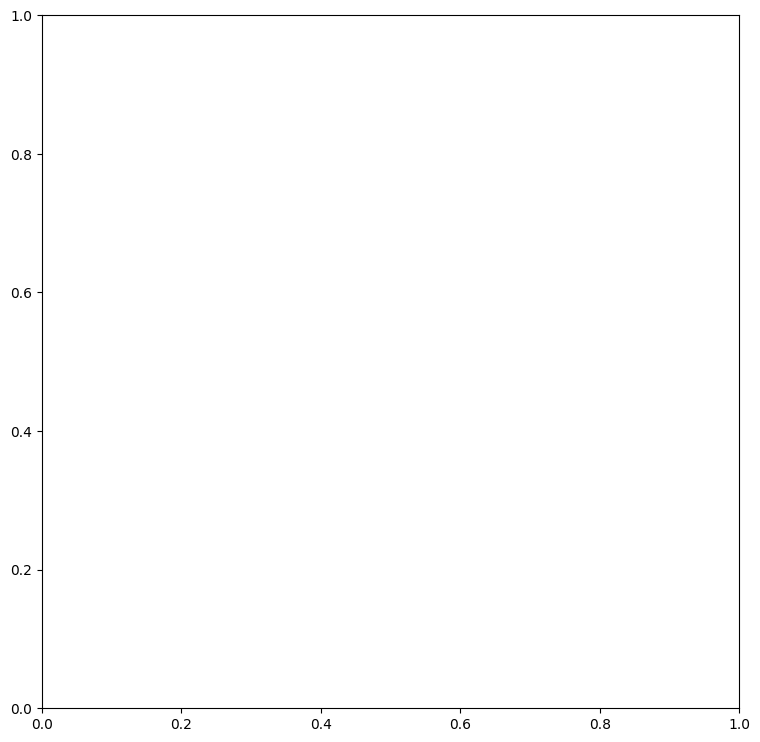

In [73]:
def plot_moran():
    f, ax = plt.subplots(1, figsize=(9, 9))
    sns.regplot(x='JAAR_VAN_A', y='geometry', data=w_queen, ci=None)
    

plot_moran()